In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import matplotlib.ticker as ticker
import scipy.stats as stats

In [2]:
#reading file and putting in to pandas data frame
file = 'data_sets/states_all.csv'
df = pd.read_csv(file)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
#deleting 1992 from data frame because of missing data
df = df.loc[df['YEAR'] != 1992,:]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,...,10156.0,9160.0,6975.0,80485.0,32347.0,115619.0,NaN,NaN,NaN,NaN
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,57701.0,53500.0,37614.0,461398.0,182737.0,647299.0,NaN,NaN,NaN,NaN
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,280280.0,125801.0,407329.0,NaN,NaN,NaN,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,3328627.0,1393530.0,4782111.0,NaN,NaN,NaN,NaN


In [4]:
#dropping all rows with missing values in specified columns and dropping all unneeded columns
new = df.dropna(subset=['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])
new = new.drop(columns=['PRIMARY_KEY','OTHER_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',"SUPPORT_SERVICES_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE"])
new['TOTAL_EXPENDITURE'] = new['TOTAL_EXPENDITURE'] * 1000
new.head()


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
204,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3.572283e+09,9633.0,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
206,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4.391555e+09,4495.0,64613.0,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
207,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2.297381e+09,1980.0,36442.0,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
208,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,3.156169e+10,73233.0,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
209,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4.075165e+09,12520.0,50707.0,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


In [5]:
new['spending'] = new['TOTAL_EXPENDITURE'] / new['ENROLL']
new2 = new.sort_values(['STATE','YEAR'],ascending=[True,True])
new2 = pd.DataFrame(new2, columns=['STATE','YEAR','spending'])
new2 = new2.dropna(subset=['spending'])
new2

,STATE,YEAR,spending
204,ALABAMA,1996,4854.225777
408,ALABAMA,2000,6852.063316
561,ALABAMA,2003,7279.752713
663,ALABAMA,2005,8095.878203
765,ALABAMA,2007,9682.120836
870,ALABAMA,2009,10481.161858
974,ALABAMA,2011,9922.935524
1076,ALABAMA,2013,10056.760612
1178,ALABAMA,2015,10206.890312
562,ALASKA,2003,12079.915681


In [6]:
#grouping by state to find sum of total revenues
group = new.groupby(['STATE'])
sum_group = group.sum()
totals = sum_group[['TOTAL_EXPENDITURE','ENROLL']]
totals['STATE'] = totals.index

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [7]:
#grouping by state to find mean values for columns where needed 
group2 = new.groupby('STATE')
avg_group = group2.mean()
scores = avg_group[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]
scores['STATE'] = scores.index    
#merging two new data frames on STATE
merger = pd.merge(totals,scores,how='outer',on='STATE')
merger['EXP/ENR'] = merger['TOTAL_EXPENDITURE'] / merger['ENROLL']
states = merger['STATE']
#fixing values in state column
states = [state.capitalize() for state in states]
merger['STATE'] = states
merger.head()
#std = merger['AVG_READING_4_SCORE'].std()
#mean = merger['AVG_READING_4_SCORE'].mean()
#print(mean)
#print(std)


C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 'STATE' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,TOTAL_EXPENDITURE,ENROLL,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXP/ENR
0,5.719238e+10,6638734.0,Alabama,226.178204,265.058556,213.761726,264.081357,8614.952791
1,1.577535e+10,921854.0,Alaska,235.281862,280.741249,210.664251,263.930407,17112.629549
2,6.553935e+10,8158927.0,Arizona,230.449272,276.087679,210.370897,264.019508,8032.839612
3,3.826616e+10,4197387.0,Arkansas,231.943693,271.615143,215.481002,263.727823,9116.662581
4,5.692697e+11,55096705.0,California,227.385691,270.201543,209.026260,261.902652,10332.191226


C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


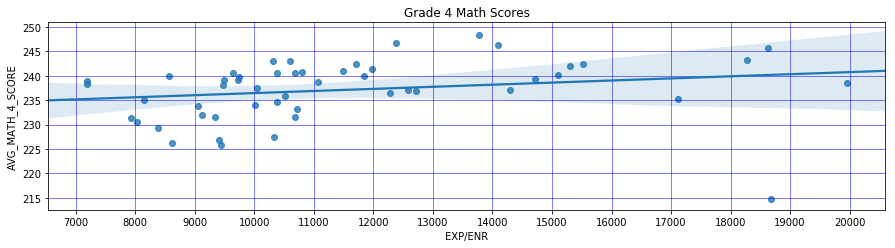

In [8]:
#regression plot for 4th grade math
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
sns.regplot(merger['EXP/ENR'],merger['AVG_MATH_4_SCORE'])
plt.title('Grade 4 Math Scores')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)

plt.savefig('math_4_reg1.png')
plt.show()

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


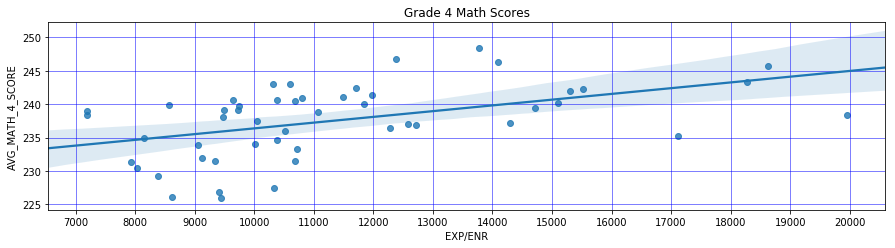

In [9]:
#took DC out and plotted again
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
merger2 = merger.loc[merger['STATE'] != 'District_of_columbia']
sns.regplot(merger2['EXP/ENR'],merger2['AVG_MATH_4_SCORE'])
plt.title('Grade 4 Math Scores')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)

plt.savefig('math_4_reg2.png')
plt.show()

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


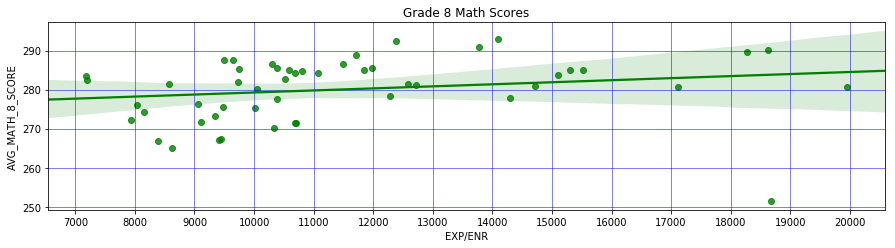

In [10]:
#regression plot for 8th grade math
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
sns.regplot(merger['EXP/ENR'],merger['AVG_MATH_8_SCORE'],color='green')
plt.title('Grade 8 Math Scores')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)
plt.savefig('math_8_reg1.png')
plt.show()

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


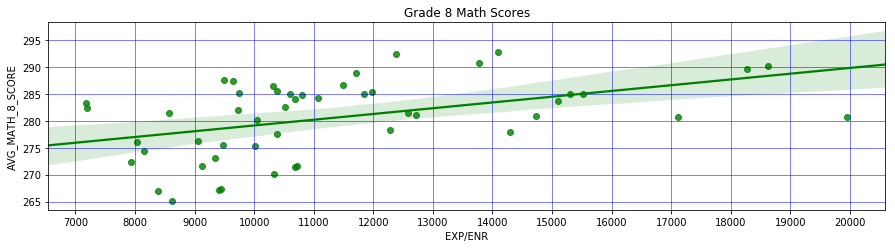

In [11]:
#took DC out and plotted again
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
sns.regplot(merger2['EXP/ENR'],merger2['AVG_MATH_8_SCORE'],color='green')
plt.title('Grade 8 Math Scores')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)
plt.savefig('math_8_reg2.png')
plt.show()

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


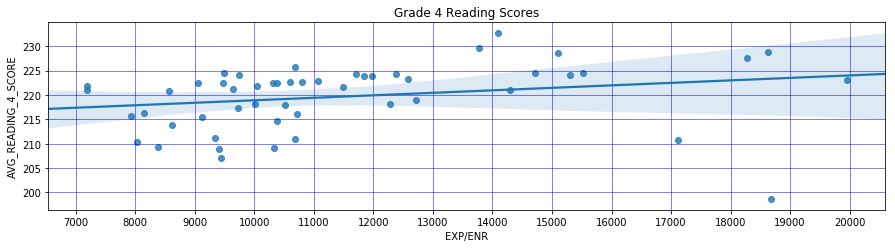

In [12]:
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
sns.regplot(merger['EXP/ENR'],merger['AVG_READING_4_SCORE'])
plt.title('Grade 4 Reading Scores')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)

plt.savefig('reading_4_reg1.png')
plt.show()

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


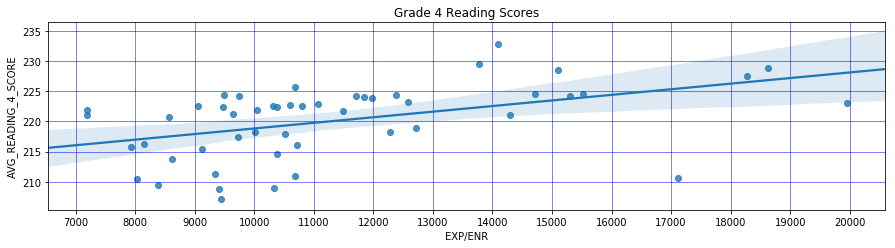

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
sns.regplot(merger2['EXP/ENR'],merger2['AVG_READING_4_SCORE'])
plt.title('Grade 4 Reading Scores')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)

plt.savefig('reading_4_reg2.png')
plt.show()

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


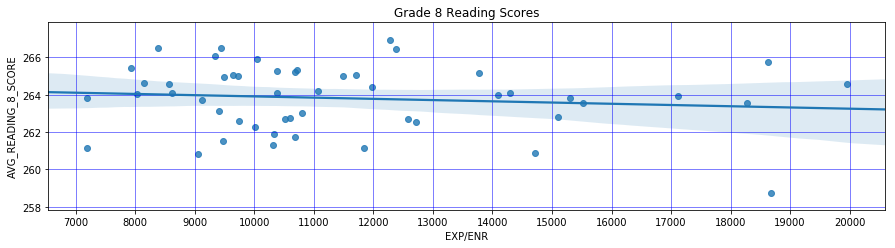

In [14]:
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
sns.regplot(merger['EXP/ENR'],merger['AVG_READING_8_SCORE'])
plt.title('Grade 8 Reading Scores')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)

plt.savefig('reading_8_reg1.png')
plt.show()

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


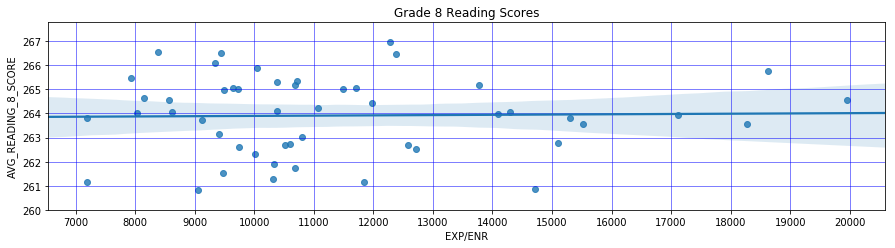

In [15]:
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
sns.regplot(merger2['EXP/ENR'],merger2['AVG_READING_8_SCORE'])
plt.title('Grade 8 Reading Scores')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)
plt.savefig('reading_8_reg2.png')
plt.show()

In [16]:
#adding region columns
merger.loc[merger.STATE.isin(['Connecticut', 'Maine', 'Massachusetts', 'New_hampshire',
                               'Rhode_island','Vermont','New_jersey', 'New_york',
                               'Pennsylvania']), 'REGION'] = 'Northeast'

merger.loc[merger.STATE.isin(['Illinois', 'Indiana', 'Michigan', 'Ohio','Wisconsin','Iowa', 'Kansas',
                               'Minnesota', 'Missouri', 'Nebraska', 'North_dakota',
                               'South_dakota']), 'REGION'] = 'Midwest'

merger.loc[merger.STATE.isin(['Delaware', 'Florida', 'Georgia', 'Maryland', 'North_carolina',
                               'South_carolina', 'Virginia','District_of_columbia','West_virginia',
                               'Alabama', 'Kentucky', 'Mississippi', 'Tennessee',
                               'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']), 'REGION'] = 'South'

merger.loc[merger.STATE.isin(['Arizona','Colorado', 'Idaho', 'Montana', 'Nevada', 'New_mexico',
                               'Utah','Wyoming','Alaska', 'California', 'Hawaii', 'Oregon',
                               'Washington']), 'REGION'] = 'West'
merger.head()

,TOTAL_EXPENDITURE,ENROLL,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXP/ENR,REGION
0,5.719238e+10,6638734.0,Alabama,226.178204,265.058556,213.761726,264.081357,8614.952791,South
1,1.577535e+10,921854.0,Alaska,235.281862,280.741249,210.664251,263.930407,17112.629549,West
2,6.553935e+10,8158927.0,Arizona,230.449272,276.087679,210.370897,264.019508,8032.839612,West
3,3.826616e+10,4197387.0,Arkansas,231.943693,271.615143,215.481002,263.727823,9116.662581,South
4,5.692697e+11,55096705.0,California,227.385691,270.201543,209.026260,261.902652,10332.191226,West


In [17]:
#splitting df by region
northeast_df = merger.loc[merger['REGION']== 'Northeast']
south_df = merger.loc[merger['REGION']=='South']
midwest_df = merger.loc[merger['REGION']=='Midwest']
west_df = merger.loc[merger['REGION']=='West']

C:\Users\roman\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(210, 250)

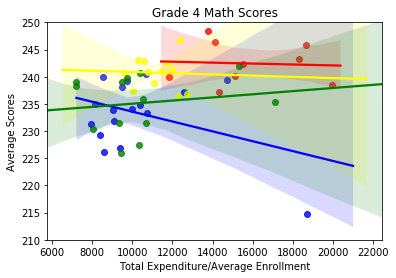

In [18]:
sns.regplot(northeast_df['EXP/ENR'],northeast_df['AVG_MATH_4_SCORE'],color='red')
plt.ylim(222,250)
sns.regplot(south_df['EXP/ENR'],south_df['AVG_MATH_4_SCORE'],color='blue')
plt.ylim(222,250)
sns.regplot(midwest_df['EXP/ENR'],midwest_df['AVG_MATH_4_SCORE'],color='yellow')
plt.ylim(222,250)
sns.regplot(west_df['EXP/ENR'],west_df['AVG_MATH_4_SCORE'],color='green')
plt.ylabel('Average Scores')
plt.xlabel('Total Expenditure/Average Enrollment')
plt.title('Grade 4 Math Scores')
plt.ylim(210,250)


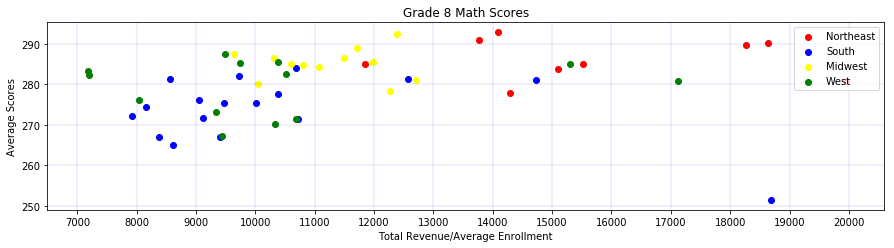

In [19]:
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(5, 1, 1)
plt.scatter(northeast_df['EXP/ENR'],northeast_df['AVG_MATH_8_SCORE'],color='red',label='Northeast')
plt.scatter(south_df['EXP/ENR'],south_df['AVG_MATH_8_SCORE'],color='blue',label='South')
plt.scatter(midwest_df['EXP/ENR'],midwest_df['AVG_MATH_8_SCORE'],color='yellow',label='Midwest')
plt.scatter(west_df['EXP/ENR'],west_df['AVG_MATH_8_SCORE'],color='green',label='West')
plt.ylabel('Average Scores')
plt.xlabel('Total Revenue/Average Enrollment')
plt.title('Grade 8 Math Scores')
plt.legend(loc='upper right')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(b=True, which='major', color='b', linewidth=0.25, alpha=.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.25, alpha=.5)


#plt.ylim(210,250)


In [21]:
stats.ttest_ind(northeast_df['AVG_MATH_8_SCOR.mean()]

SyntaxError: EOL while scanning string literal (<ipython-input-21-3cee28a6e03d>, line 1)